# Assignment 1

## 1. load data and convert stock value to USD

In [1]:
%pip install openpyxl
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install quadprog

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import t
import quadprog

In [3]:
df_stock = pd.read_excel("PS1_data.xlsx", sheet_name="hard_copy", header=None)
df_stock.drop([0,1], inplace = True)
df_stock.columns = df_stock.iloc[0]
df_stock = df_stock[1:]
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock.set_index(df_stock['date'], inplace=True)
df_stock.drop(['date'], axis = 1, inplace=True)
df_stock = df_stock.astype(float, errors='ignore')
df_stock

2,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-03-30,13165.500000,5634.160156,6917.029785,4181.029785,17287.650391,6308.03,1420.86,45805.0
2007-04-02,13265.799805,5645.560059,6937.169922,4189.549805,17028.410156,6315.53,1424.55,45597.0
2007-04-03,13361.200195,5711.910156,7045.560059,4246.299805,17244.050781,6366.11,1437.77,46288.0
2007-04-04,13448.299805,5739.009766,7073.910156,4261.830078,17544.089844,6364.70,1439.37,46554.0
2007-04-05,13425.000000,5741.379883,7099.910156,4271.540039,17491.419922,6397.34,1443.76,46647.0
...,...,...,...,...,...,...,...,...
2021-12-21,20924.900391,6964.990234,15447.440430,4174.990234,28517.589844,7297.41,4649.23,105500.0
2021-12-22,21070.099609,7051.669922,15593.469727,4217.060059,28562.210938,7341.66,4696.56,105244.0
2021-12-23,21218.900391,7106.149902,15756.309570,4265.859863,28798.369141,7373.34,4725.79,104891.0


Now we load the data from the other sheet in order to convert all prices to usd.

In [4]:
df_currencies = pd.read_excel('PS1_data.xlsx', sheet_name = 'value_usd', header=None)

df_currencies.drop([0, 1], inplace=True)
df_currencies.columns = df_currencies.iloc[0]
df_currencies = df_currencies[1:]
df_currencies['date'] = pd.to_datetime(df_currencies['date'])
df_currencies.set_index(df_currencies['date'], inplace=True)
df_currencies.drop(['date'], axis=1, inplace=True)
df_currencies = df_currencies.astype(float, errors='ignore')
df_currencies

2,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-03-30,0.866326,1.335898,1.335898,1.335898,0.008488,1.952515,1.0,0.486618
2007-04-02,0.864902,1.337006,1.337006,1.337006,0.008492,1.978200,1.0,0.489357
2007-04-03,0.863148,1.332498,1.332498,1.332498,0.008413,1.973399,1.0,0.491666
2007-04-04,0.863036,1.337399,1.337399,1.337399,0.008420,1.976402,1.0,0.492926
2007-04-05,0.868885,1.343201,1.343201,1.343201,0.008425,1.971492,1.0,0.493243
...,...,...,...,...,...,...,...,...
2021-12-21,0.773036,1.127752,1.127752,1.127752,0.008798,1.321000,1.0,0.174177
2021-12-22,0.773814,1.128757,1.128757,1.128757,0.008772,1.326964,1.0,0.174095
2021-12-23,0.778137,1.132888,1.132888,1.132888,0.008763,1.335203,1.0,0.176897


The next dataframe contains the prices of the stocks in USD.

In [5]:
df_stock_usd = df_stock * df_currencies
df_stock_usd

2,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-03-30,11405.614953,7526.663284,9240.446256,5585.429328,146.737577,12316.523195,1420.86,22289.537490
2007-04-02,11473.616783,7548.147672,9275.037809,5601.453227,144.605259,12493.381446,1424.55,22313.211129
2007-04-03,11532.693226,7611.108859,9388.194687,5658.185998,145.074199,12562.875108,1437.77,22758.235808
2007-04-04,11606.366871,7675.345922,9460.640369,5699.767284,147.721236,12579.205809,1439.37,22947.677004
2007-04-05,11664.781125,7711.827200,9536.606421,5737.536852,147.365213,12612.304631,1443.76,23008.306221
...,...,...,...,...,...,...,...,...
2021-12-21,16175.701299,7854.781666,17420.881840,4708.353586,250.897755,9639.878610,4649.23,18375.673500
2021-12-22,16304.338059,7959.621786,17601.238109,4760.036061,250.547714,9742.118520,4696.56,18322.454180
2021-12-23,16511.211494,8050.471950,17850.134036,4832.741448,252.360109,9844.905688,4725.79,18554.903227


Now let's compute log returns for all stocks.

In [6]:
df_returns = np.log(df_stock_usd / df_stock_usd.shift(1))
df_returns.drop([df_returns.index[0]], axis=0, inplace=True)
df_returns

2,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-04-02,0.005944,0.002850,0.003737,0.002865,-0.014638,0.014257,0.002594,0.001062
2007-04-03,0.005136,0.008307,0.012126,0.010077,0.003238,0.005547,0.009237,0.019748
2007-04-04,0.006368,0.008404,0.007687,0.007322,0.018082,0.001299,0.001112,0.008290
2007-04-05,0.005020,0.004742,0.007998,0.006605,-0.002413,0.002628,0.003045,0.002639
2007-04-10,0.003777,0.004326,0.009359,0.006982,0.006290,0.003346,0.003202,0.011431
...,...,...,...,...,...,...,...,...
2021-12-21,0.015750,0.016735,0.016559,0.019405,0.019291,0.012242,0.017622,-0.003873
2021-12-22,0.007921,0.013259,0.010300,0.010917,-0.001396,0.010550,0.010129,-0.002900
2021-12-23,0.012608,0.011349,0.014042,0.015159,0.007208,0.010496,0.006204,0.012607


After that, here are the information about the stocks.

In [7]:
df_returns.describe()

2,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,0.000117,0.000025,0.000207,-0.000041,0.000165,-0.000065,0.000374,-0.000060
std,0.015251,0.018352,0.018058,0.018481,0.016163,0.015374,0.013581,0.024794
min,-0.134755,-0.135855,-0.135420,-0.137276,-0.180166,-0.122238,-0.127652,-0.196712
25%,-0.005599,-0.007670,-0.007423,-0.007660,-0.006992,-0.006934,-0.004264,-0.011410
50%,0.000963,0.000566,0.000685,0.000556,0.000484,0.000320,0.000812,0.000018
75%,0.006798,0.008451,0.008548,0.008583,0.007909,0.007409,0.006232,0.012528
max,0.111736,0.242904,0.233184,0.243568,0.176489,0.133055,0.104236,0.258927


How about skewness?

In [8]:
df_returns.skew()

2
TSX           -0.866287
CAC            0.372231
DAX            0.410990
Eurostoxx50    0.283744
NIKKEI225     -0.552431
FTSE100       -0.274447
SP500         -0.637743
IBOVESPA      -0.154794
dtype: float64

And kurtosis?

In [9]:
df_returns.kurtosis()

2
TSX            12.306159
CAC            17.583211
DAX            16.916223
Eurostoxx50    16.980611
NIKKEI225      16.738605
FTSE100        10.097418
SP500          12.021852
IBOVESPA       11.078068
dtype: float64

And finally here is the correlation matrix.

In [10]:
df_returns.corr()

2,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
2,,,,,,,,
TSX,1.000000,0.677227,0.659697,0.661918,0.222340,0.716389,0.771410,0.685627
CAC,0.677227,1.000000,0.950523,0.984838,0.260700,0.841713,0.612419,0.567331
DAX,0.659697,0.950523,1.000000,0.966589,0.246152,0.809851,0.615929,0.540996
Eurostoxx50,0.661918,0.984838,0.966589,1.000000,0.248228,0.830241,0.611192,0.553301
NIKKEI225,0.222340,0.260700,0.246152,0.248228,1.000000,0.343642,0.099309,0.238317
FTSE100,0.716389,0.841713,0.809851,0.830241,0.343642,1.000000,0.616687,0.617852
SP500,0.771410,0.612419,0.615929,0.611192,0.099309,0.616687,1.000000,0.610080
IBOVESPA,0.685627,0.567331,0.540996,0.553301,0.238317,0.617852,0.610080,1.000000


Here is how to do without built in functions

In [11]:
X = df_returns.to_numpy(dtype=float)
n = X.shape[0]
mu = X.mean(axis=0)
xc = X - mu
m2 = (xc**2).sum(axis=0) / n
m3 = (xc**3).sum(axis=0) / n
g1 = m3 / np.power(m2, 1.5)
skew_manual = pd.Series(g1, index=df_returns.columns)
skew_manual

2
TSX           -0.865886
CAC            0.372059
DAX            0.410799
Eurostoxx50    0.283613
NIKKEI225     -0.552175
FTSE100       -0.274320
SP500         -0.637448
IBOVESPA      -0.154722
dtype: float64

In [12]:
X = df_returns.to_numpy(dtype=float)
n = X.shape[0]
mu = X.mean(axis=0)
xc = X - mu
m2 = (xc**2).sum(axis=0) / n
m4 = (xc**4).sum(axis=0) / n
kurt_manual = m4 / (m2**2) - 3      
kurt_manual = pd.Series(kurt_manual, index=df_returns.columns)
kurt_manual

2
TSX            12.285325
CAC            17.554237
DAX            16.888278
Eurostoxx50    16.952566
NIKKEI225      16.710934
FTSE100        10.079991
SP500          12.001456
IBOVESPA       11.059129
dtype: float64

In [13]:
X = df_returns.to_numpy(dtype=float)
Xc = X - X.mean(axis=0)
std = Xc.std(axis=0, ddof=1)
corr_manual = (Xc / std).T @ (Xc / std) / (Xc.shape[0] - 1)
corr_manual = pd.DataFrame(
    corr_manual, index=df_returns.columns, columns=df_returns.columns)
corr_manual

2,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
2,,,,,,,,
TSX,1.000000,0.677227,0.659697,0.661918,0.222340,0.716389,0.771410,0.685627
CAC,0.677227,1.000000,0.950523,0.984838,0.260700,0.841713,0.612419,0.567331
DAX,0.659697,0.950523,1.000000,0.966589,0.246152,0.809851,0.615929,0.540996
Eurostoxx50,0.661918,0.984838,0.966589,1.000000,0.248228,0.830241,0.611192,0.553301
NIKKEI225,0.222340,0.260700,0.246152,0.248228,1.000000,0.343642,0.099309,0.238317
FTSE100,0.716389,0.841713,0.809851,0.830241,0.343642,1.000000,0.616687,0.617852
SP500,0.771410,0.612419,0.615929,0.611192,0.099309,0.616687,1.000000,0.610080
IBOVESPA,0.685627,0.567331,0.540996,0.553301,0.238317,0.617852,0.610080,1.000000


In [14]:
random_norm = np.random.normal(0, 0.01, 3240)

random_t = np.random.standard_t(df=3, size=3240) * 0.01

df_returns["Stock_Gaussian"] = random_norm
# df_returns["Stock_FatTails"] = random_t

In [15]:
def plot_qq_grid_norm_dist(df):
    """
    Creates a grid of Q-Q plots for every column in the dataframe.
    """
    stocks = df.columns
    num_stocks = len(stocks)

    # Calculate grid dimensions (e.g., 2 columns wide)
    cols = 3
    rows = (num_stocks + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axes = axes.flatten()  # Flatten 2D array of axes to 1D for easy looping

    for i, stock in enumerate(stocks):
        ax = axes[i]

        # Drop NAs (critical for returns data)
        clean_data = df[stock].dropna()

        # stats.probplot calculates the quantiles and the regression line
        # dist="norm" compares it against a Normal distribution
        stats.probplot(clean_data, dist="norm", plot=ax)

        # Customizing the plot for clarity
        ax.set_title(f"Q-Q Plot: {stock}", fontsize=12, fontweight='bold')
        ax.get_lines()[0].set_markerfacecolor('#1f77b4')  # Blue dots
        ax.get_lines()[0].set_markersize(4.0)
        ax.get_lines()[1].set_color('#d62728')           # Red fit line
        ax.get_lines()[1].set_linewidth(2.0)

    # Hide unused subplots if number of stocks is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    fig.legend(['Data', 'Fit line'], loc='upper left')

    plt.tight_layout()
    plt.show()

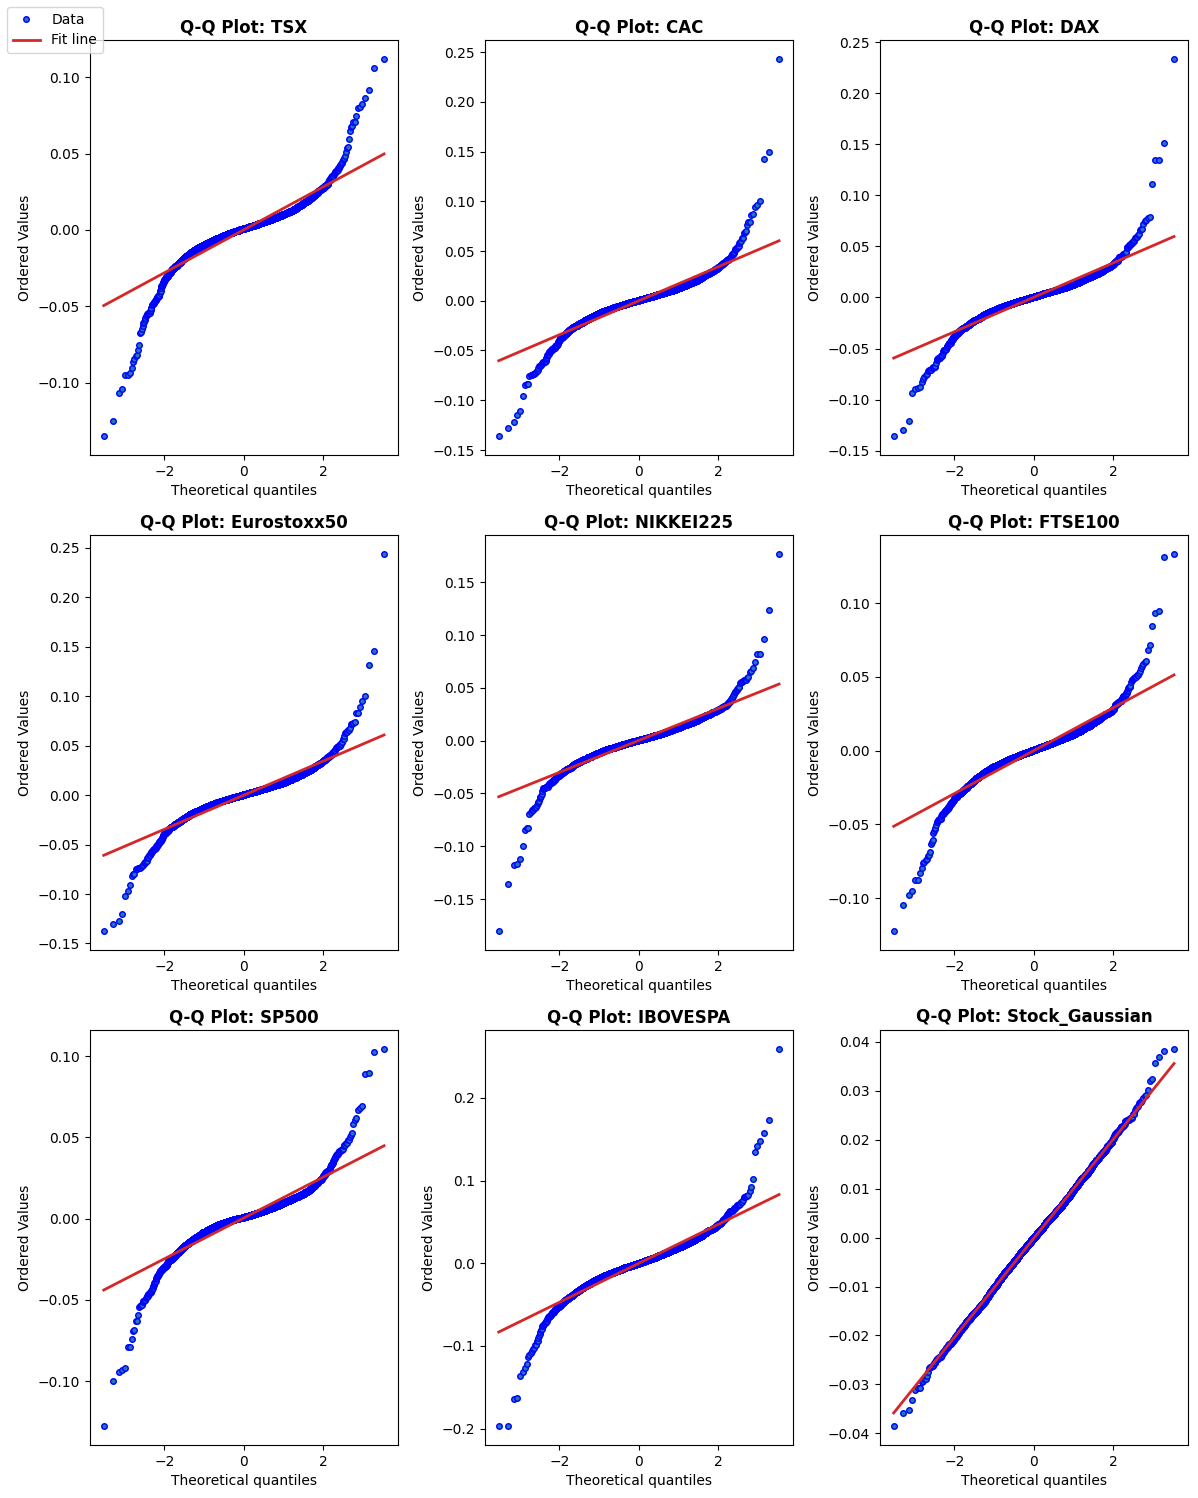

In [16]:
plot_qq_grid_norm_dist(df_returns)

None of the stocks fits the red line, which means none of them is normally distributed. This S shape is reflecting the fat tails of the distribution which then indicate a potential approximation to a t-distribution.

## Question 2

Assuming 252 days per year (nb of trading days)

In [17]:
df_returns.drop(["Stock_Gaussian"], axis=1, inplace=True)

In [18]:
mu = df_returns.mean() * 252
Sigma = df_returns.cov() * 252

n_assets = len(mu)

# --- 2. Define the Quadprog Solver Function ---


def solve_qp_markowitz(Sigma, mu, target_return):
    """
    Solves for weights w to Min (1/2)w'Sigma w
    Subject to: sum(w)=1, w'mu=target_return, w>=0
    """

    # 1. Quadratic term (G): The Covariance Matrix
    # quadprog requires a symmetric matrix. ensure it is perfectly symmetric.
    G = Sigma.values

    # 2. Linear term (a): Zeros (since we minimize Variance)
    a = np.zeros(n_assets)

    # 3. Constraints (C, b)
    # Equation: C.T * x >= b

    # Constraint 1: Sum of weights = 1 (Equality)
    # Vector of ones: [1, 1, ... 1]
    C1 = np.ones((n_assets, 1))
    b1 = np.array([1.0])

    # Constraint 2: Portfolio Return = Target Return (Equality)
    # Vector of means: [mu1, mu2, ... mun]
    C2 = mu.values.reshape(-1, 1)
    b2 = np.array([target_return])

    # Constraint 3: Long Only (w >= 0) (Inequality)
    # Identity matrix: I * w >= 0
    C3 = np.eye(n_assets)
    b3 = np.zeros(n_assets)

    # Stack the constraint matrices
    # Note: quadprog expects C to be (n_vars x n_constraints)
    C = np.hstack((C1, C2, C3))
    b = np.hstack((b1, b2, b3))

    # meq = 2 because the first two constraints (Sum=1, Return=Target) are equalities
    result = quadprog.solve_qp(G, a, C, b, meq=2)

    return result[0]  # This returns the optimal weights w

In [19]:
# --- 3. Trace the Efficient Frontier ---
# We define a range of target returns from the min individual asset return to the max
target_returns = np.linspace(mu.min(), mu.max(), 50)
frontier_volatility = []
frontier_returns = []

for r in target_returns:
    try:
        w = solve_qp_markowitz(Sigma, mu, r)
        port_return = np.dot(w, mu)
        port_vol = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))

        frontier_returns.append(port_return)
        frontier_volatility.append(port_vol)
    except:
        # Solver might fail if the target return is infeasible
        pass

In [20]:
# --- 4. Find the Tangency Portfolio (Max Sharpe) ---
# Assuming Risk Free Rate = 0 for simplicity, or set your own
rf = 0.0
sharpe_ratios = (np.array(frontier_returns) - rf) / \
    np.array(frontier_volatility)
max_sharpe_idx = np.argmax(sharpe_ratios)

tangency_vol = frontier_volatility[max_sharpe_idx]
tangency_ret = frontier_returns[max_sharpe_idx]

/var/folders/9q/bytq5gl17h3dwptwm8jtkd8h0000gn/T/ipykernel_6554/2964850002.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (asset_vols[i], mu[i]), xytext=(


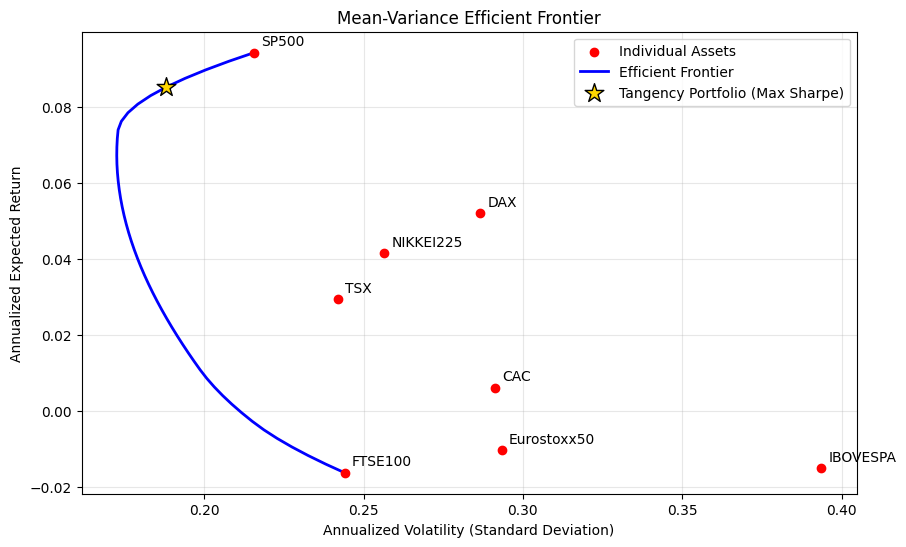

In [21]:
# --- 5. Plotting ---
plt.figure(figsize=(10, 6))

# Plot Individual Assets
asset_vols = np.sqrt(np.diag(Sigma))
plt.scatter(asset_vols, mu, color='red', label='Individual Assets', zorder=5)
for i, txt in enumerate(df_returns.columns):
    plt.annotate(txt, (asset_vols[i], mu[i]), xytext=(
        5, 5), textcoords='offset points')

# Plot Efficient Frontier
plt.plot(frontier_volatility, frontier_returns, 'b-',
         linewidth=2, label='Efficient Frontier')

# Plot Tangency Portfolio
plt.scatter(tangency_vol, tangency_ret, color='gold', marker='*', s=200,
            edgecolors='black', label='Tangency Portfolio (Max Sharpe)', zorder=6)

plt.title('Mean-Variance Efficient Frontier')
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Expected Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()